In [48]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.express as px


In [42]:
df = pd.read_csv("../data/dataset.csv", index_col=0)
datetime_series = pd.to_datetime(
    df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE']])
df['DATA'] = datetime_series
df.dropna(subset=['NEIGHBOURHOOD'], inplace=True)


def estacao_do_ano(data):
    import datetime
    month = data.month
    day = data.day
    year = data.year

    if (datetime.date(year, month, day) >= datetime.date(year, 3, 20)) and (datetime.date(year, month, day) < datetime.date(year, 6, 21)):
        return 'Spring'
    elif (datetime.date(year, month, day) >= datetime.date(year, 6, 21)) and (datetime.date(year, month, day) < datetime.date(year, 9, 23)):
        return 'Summer'
    elif (datetime.date(year, month, day) >= datetime.date(year, 9, 23)) and (datetime.date(year, month, day) < datetime.date(year, 12, 21)):
        return 'Autumn'
    else:
        return 'Winter'

# Aplicar a função para criar uma nova coluna 'estacao'
df['SEASON'] = df['DATA'].apply(estacao_do_ano)

# To dict - para salvar no dcc.store
df_store = df.to_dict()
df = pd.DataFrame(df_store)
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,DATA,SEASON
0,Theft from Vehicle,2012,9,28,7,0,X NK_LOC ST,Strathcona,492757.4868,5.458792e+06,2012-09-28 07:00:00,Autumn
1,Break and Enter Commercial,2012,5,9,20,0,6XX ABBOTT ST,Central Business District,492167.2364,5.458548e+06,2012-05-09 20:00:00,Spring
2,Break and Enter Commercial,2012,2,14,3,33,6XX ABBOTT ST,Central Business District,492167.1811,5.458542e+06,2012-02-14 03:33:00,Winter
3,Break and Enter Commercial,2012,10,23,3,15,6XX ABBOTT ST,Central Business District,492166.4427,5.458455e+06,2012-10-23 03:15:00,Autumn
4,Break and Enter Commercial,2012,9,24,10,0,6XX ABBOTT ST,Central Business District,492166.4427,5.458455e+06,2012-09-24 10:00:00,Autumn


In [43]:
df = df.groupby(['TYPE', 'NEIGHBOURHOOD']).count()[
    'DAY'].reset_index().rename(columns={'DAY': 'COUNTING'})



In [46]:
df = df.sort_values(['COUNTING', 'NEIGHBOURHOOD'],
                    ascending=False).reset_index()
aux1 = df.copy()
aux1['NEIGHBOURHOOD'] = np.where(
    aux1.loc[:, "COUNTING"] < aux1.at[aux1.index[4], "COUNTING"], "Others Neighbourhoods", aux1['NEIGHBOURHOOD'])



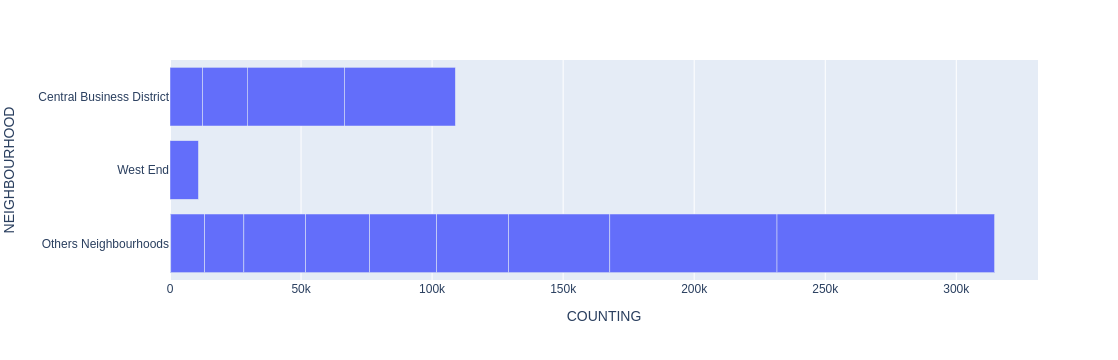

In [49]:
aux1 = aux1.groupby(['TYPE', 'NEIGHBOURHOOD'])['COUNTING'].sum(
).reset_index().sort_values(['COUNTING'])

# fig_bar = px.pie(aux, values='COUNTING', names='NEIGHBOURHOOD', title=None)
fig_bar = px.bar(aux1, x='COUNTING', y='NEIGHBOURHOOD', title=None)
# fig_bar.update_layout(main_config, height=170,
#                       yaxis_title=None)

fig_bar.show()